In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt
import Utilities.prelude
import math
import k3match

from Utilities.operators import calc_grad, make_tree

In [2]:
sim_tree, X, Y, Z, Vol, VX, _, _, _, _, _ = make_tree('TDE/683', 683, True)
dim_cell = (3*Vol/(4*np.pi))**(1/3)


In [54]:
#choose an easy function to know its derivative
VX = np.sin(X) 

In [3]:
coordinates = []
for i in range(0,len(X)):
    if np.abs(Z[i])<10:
        coordinates.append([X[i], Y[i]])

In [4]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(coordinates)

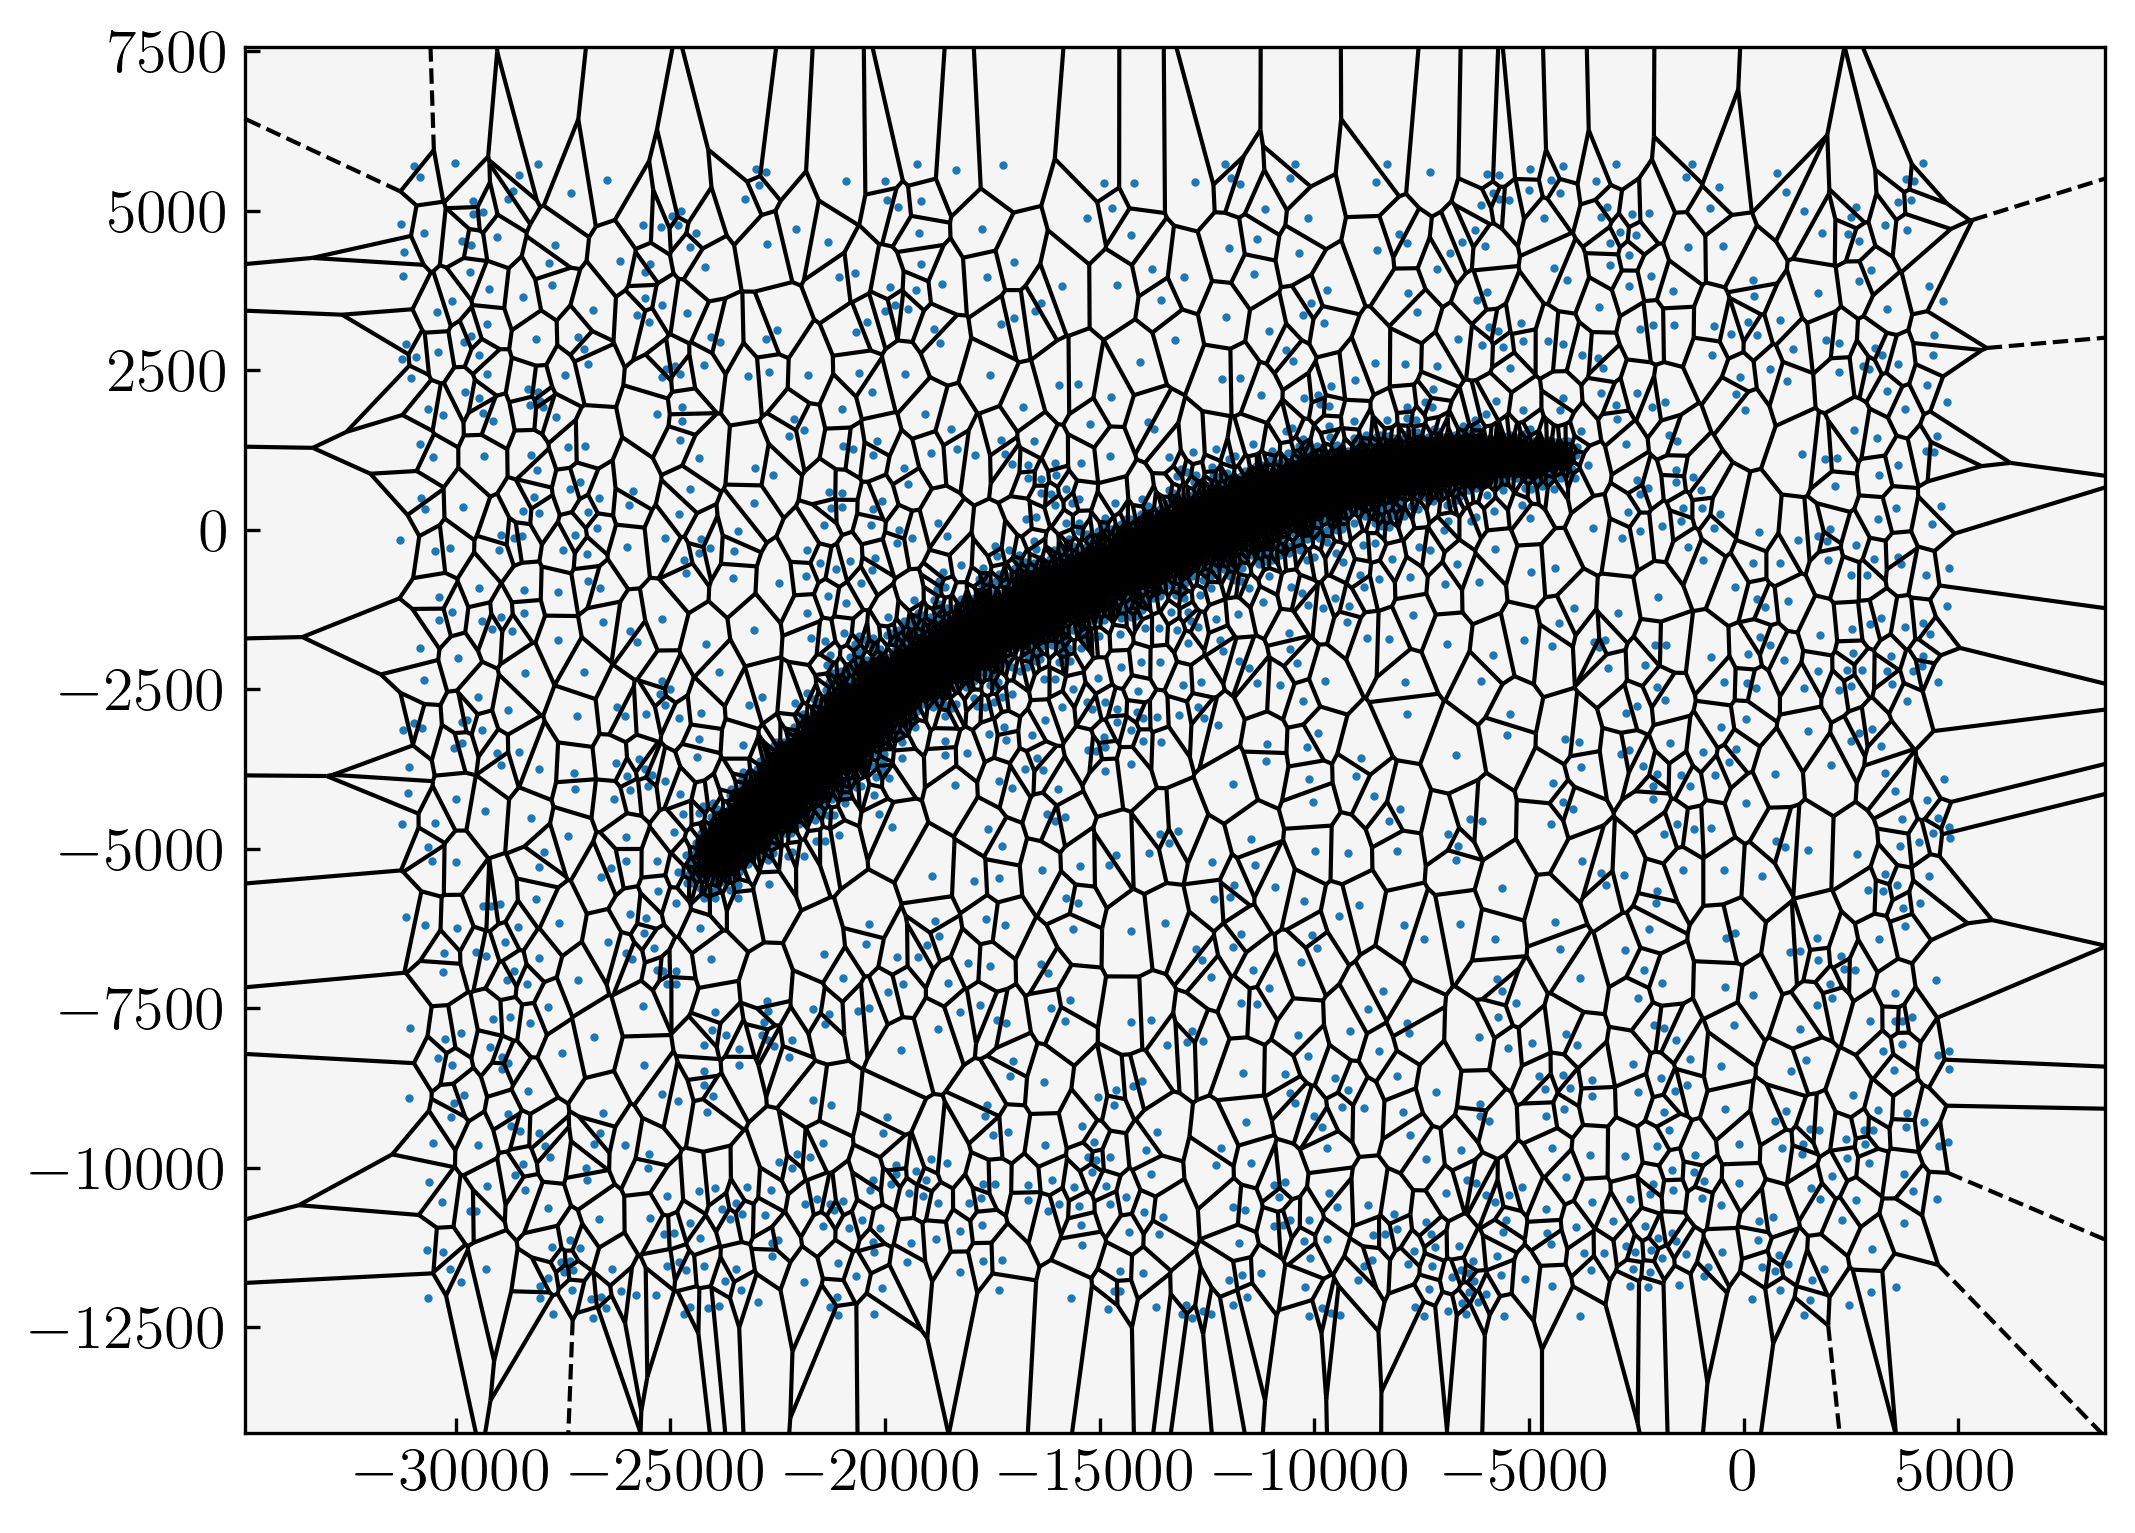

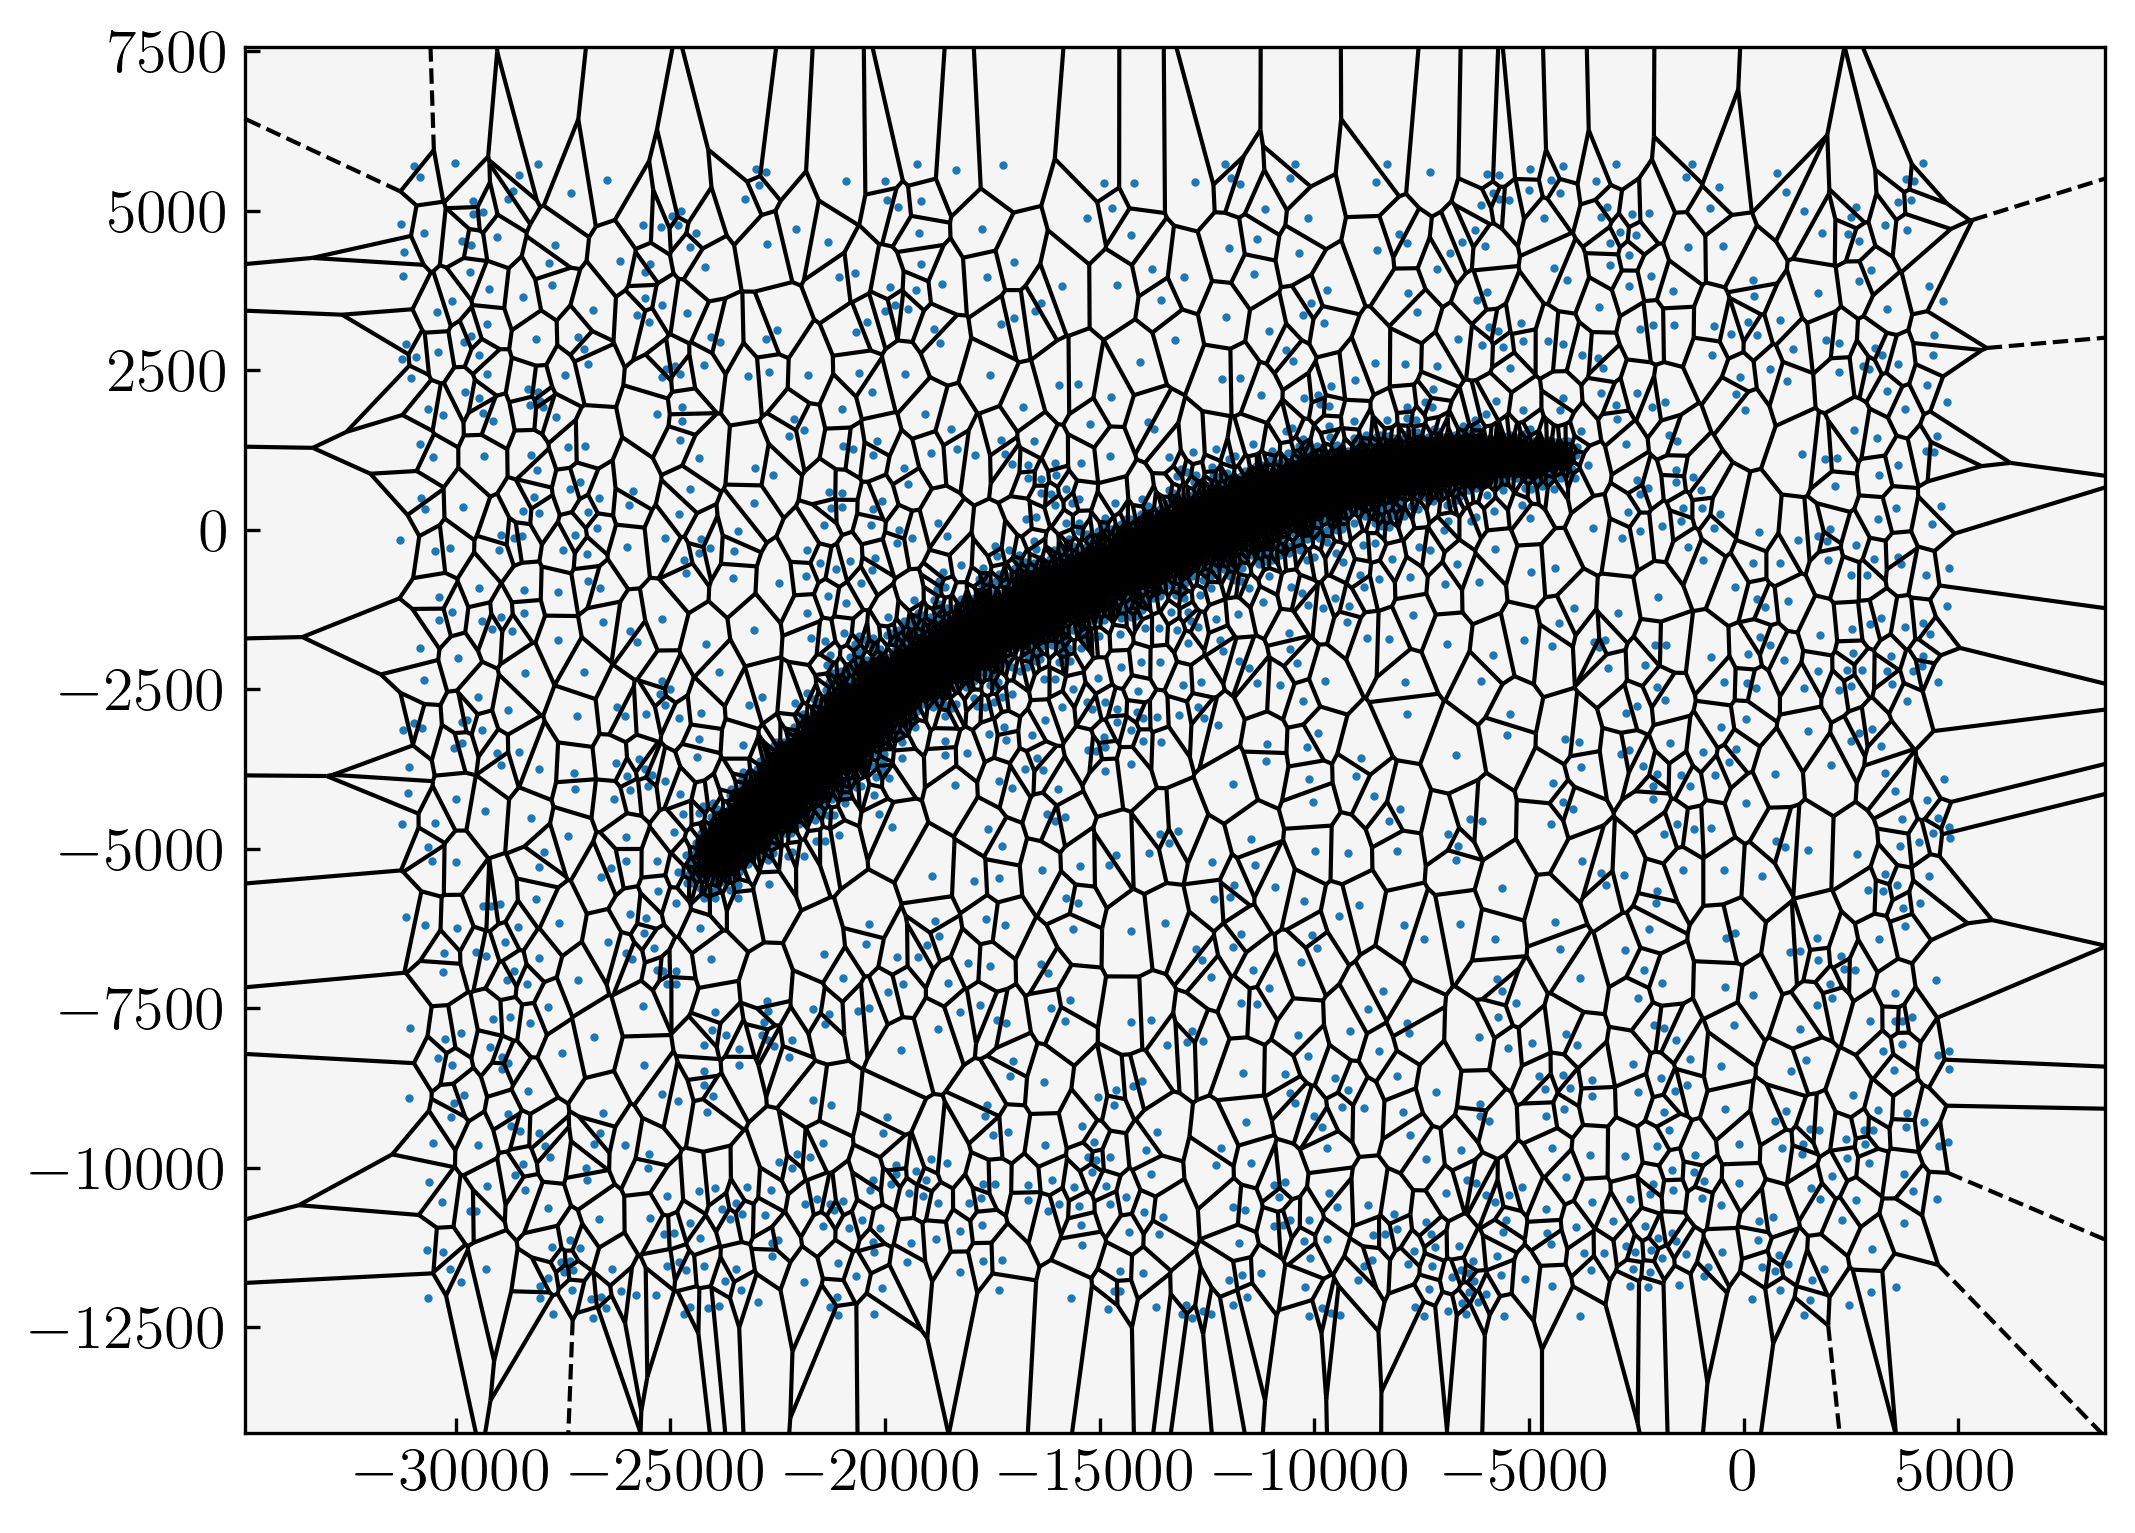

In [5]:
voronoi_plot_2d(vor, show_vertices=False, point_size=2)

(-10000.0, -4000.0)

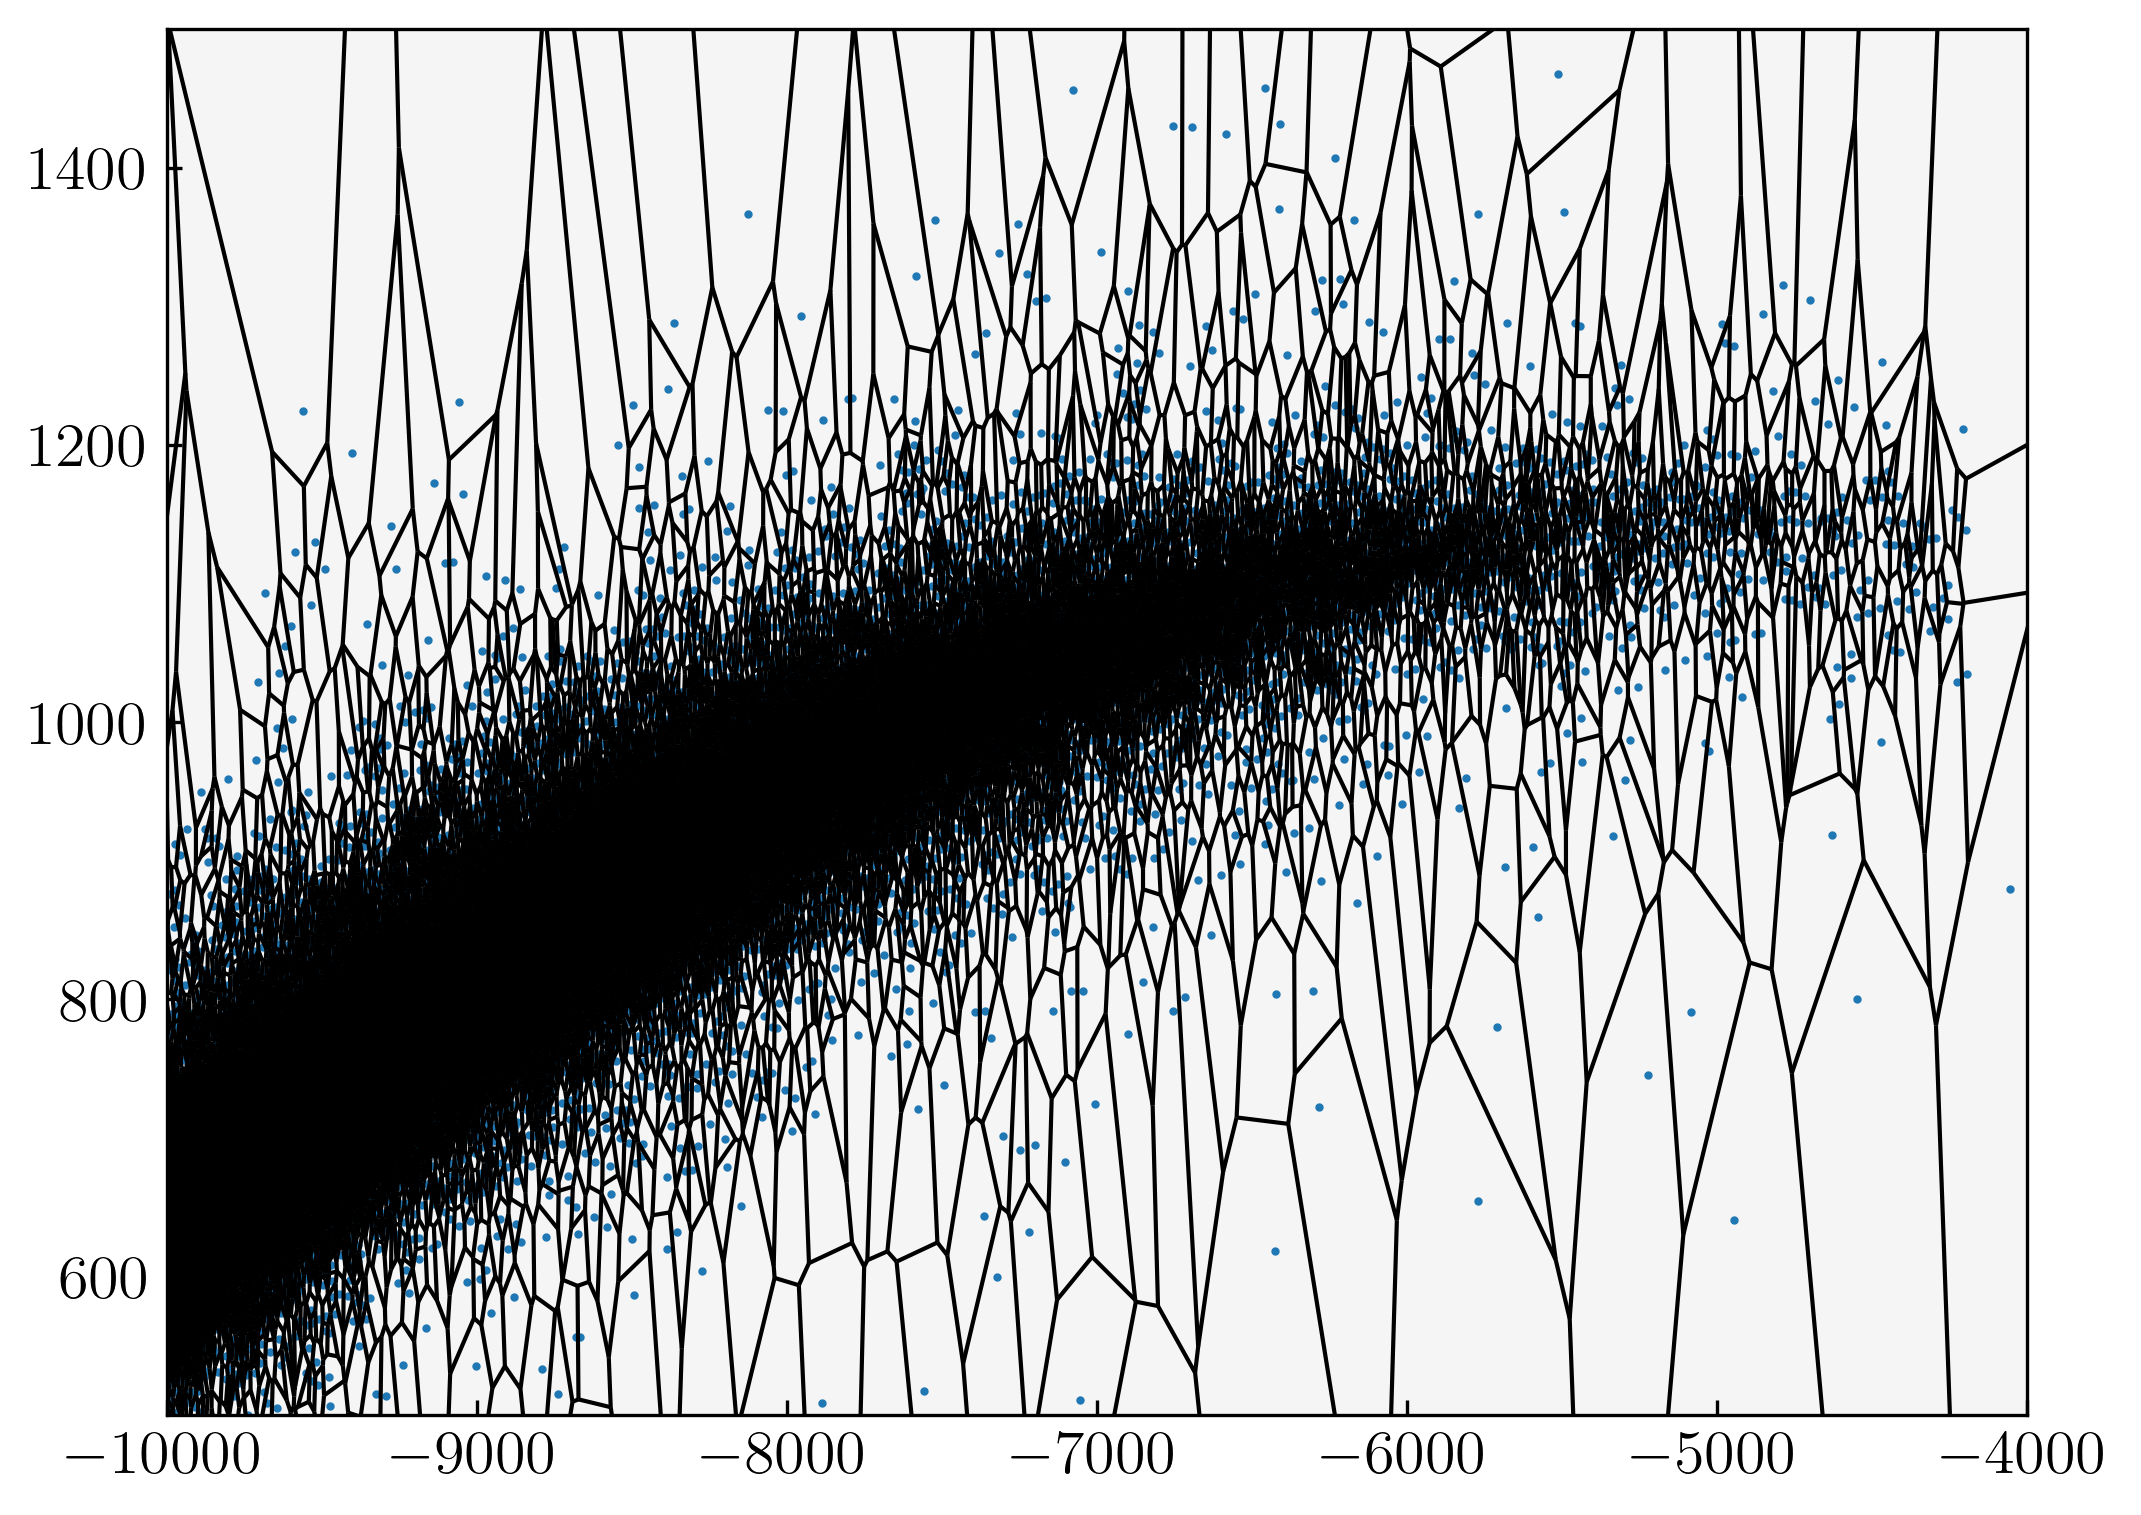

In [10]:
# voronoi_plot_2d(vor, show_vertices=False, point_size=2)
# plt.ylim(500,1500)
# plt.xlim(-10_000,-4000)

In [55]:
grad_test = []
to_plot = []
X_plot = [] 
Y_plot = [] 
Z_plot = [] 

count = 0
i = -1
#for i in range(len(X)):
while count <20:
    i += 1
    point = [X[i],Y[i],Z[i]]

    if X[i]<-8000 or X[i]> -4000:
        if Y[i]<0 or Y[i]>1000:
            if Z[i]<-100 or Z[i]>100:
                continue

    print(i)
    X_tosearch = np.delete(X,[i])
    Y_tosearch = np.delete(Y,[i])
    Z_tosearch = np.delete(Z,[i])

    #_, _, dist = k3match.cartesian(X_tosearch, Y_tosearch, Z_tosearch, X[i],Y[i],Z[i], 2*dim_cell[i])
    step = dim_cell[i]#np.min(dist)
    dsx =calc_grad(sim_tree, X, Y, Z, VX, point, step)[0]

    grad_test.append(dsx)
    X_plot.append(X[i])
    Y_plot.append(Y[i])
    Z_plot.append(Z[i])
    to_plot.append(np.cos(X[i])) #d/dx(sinx)
    count += 1

2610
2611
2612
2619
2620
2624
2629
2637
2646
2647
2648
2693
2694
2706
2713
2714
2733
2735
2736
2770


In [56]:
grad_test = np.array(grad_test)
to_plot = np.array(to_plot)
ratio_test = 1- grad_test / to_plot

In [57]:
ratio_test

array([1.0016182 , 0.99672811, 0.99681851, 1.01298094, 0.99364186,
       1.00003314, 1.0074804 , 1.00307235, 1.00543895, 1.00106478,
       0.99947943, 0.99669398, 1.00633716, 0.98322018, 0.98992276,
       0.99837512, 1.01151799, 1.00103887, 1.03052793, 1.00226233])

Text(0.5, 0.98, '$\\partial\\sin(x)$')

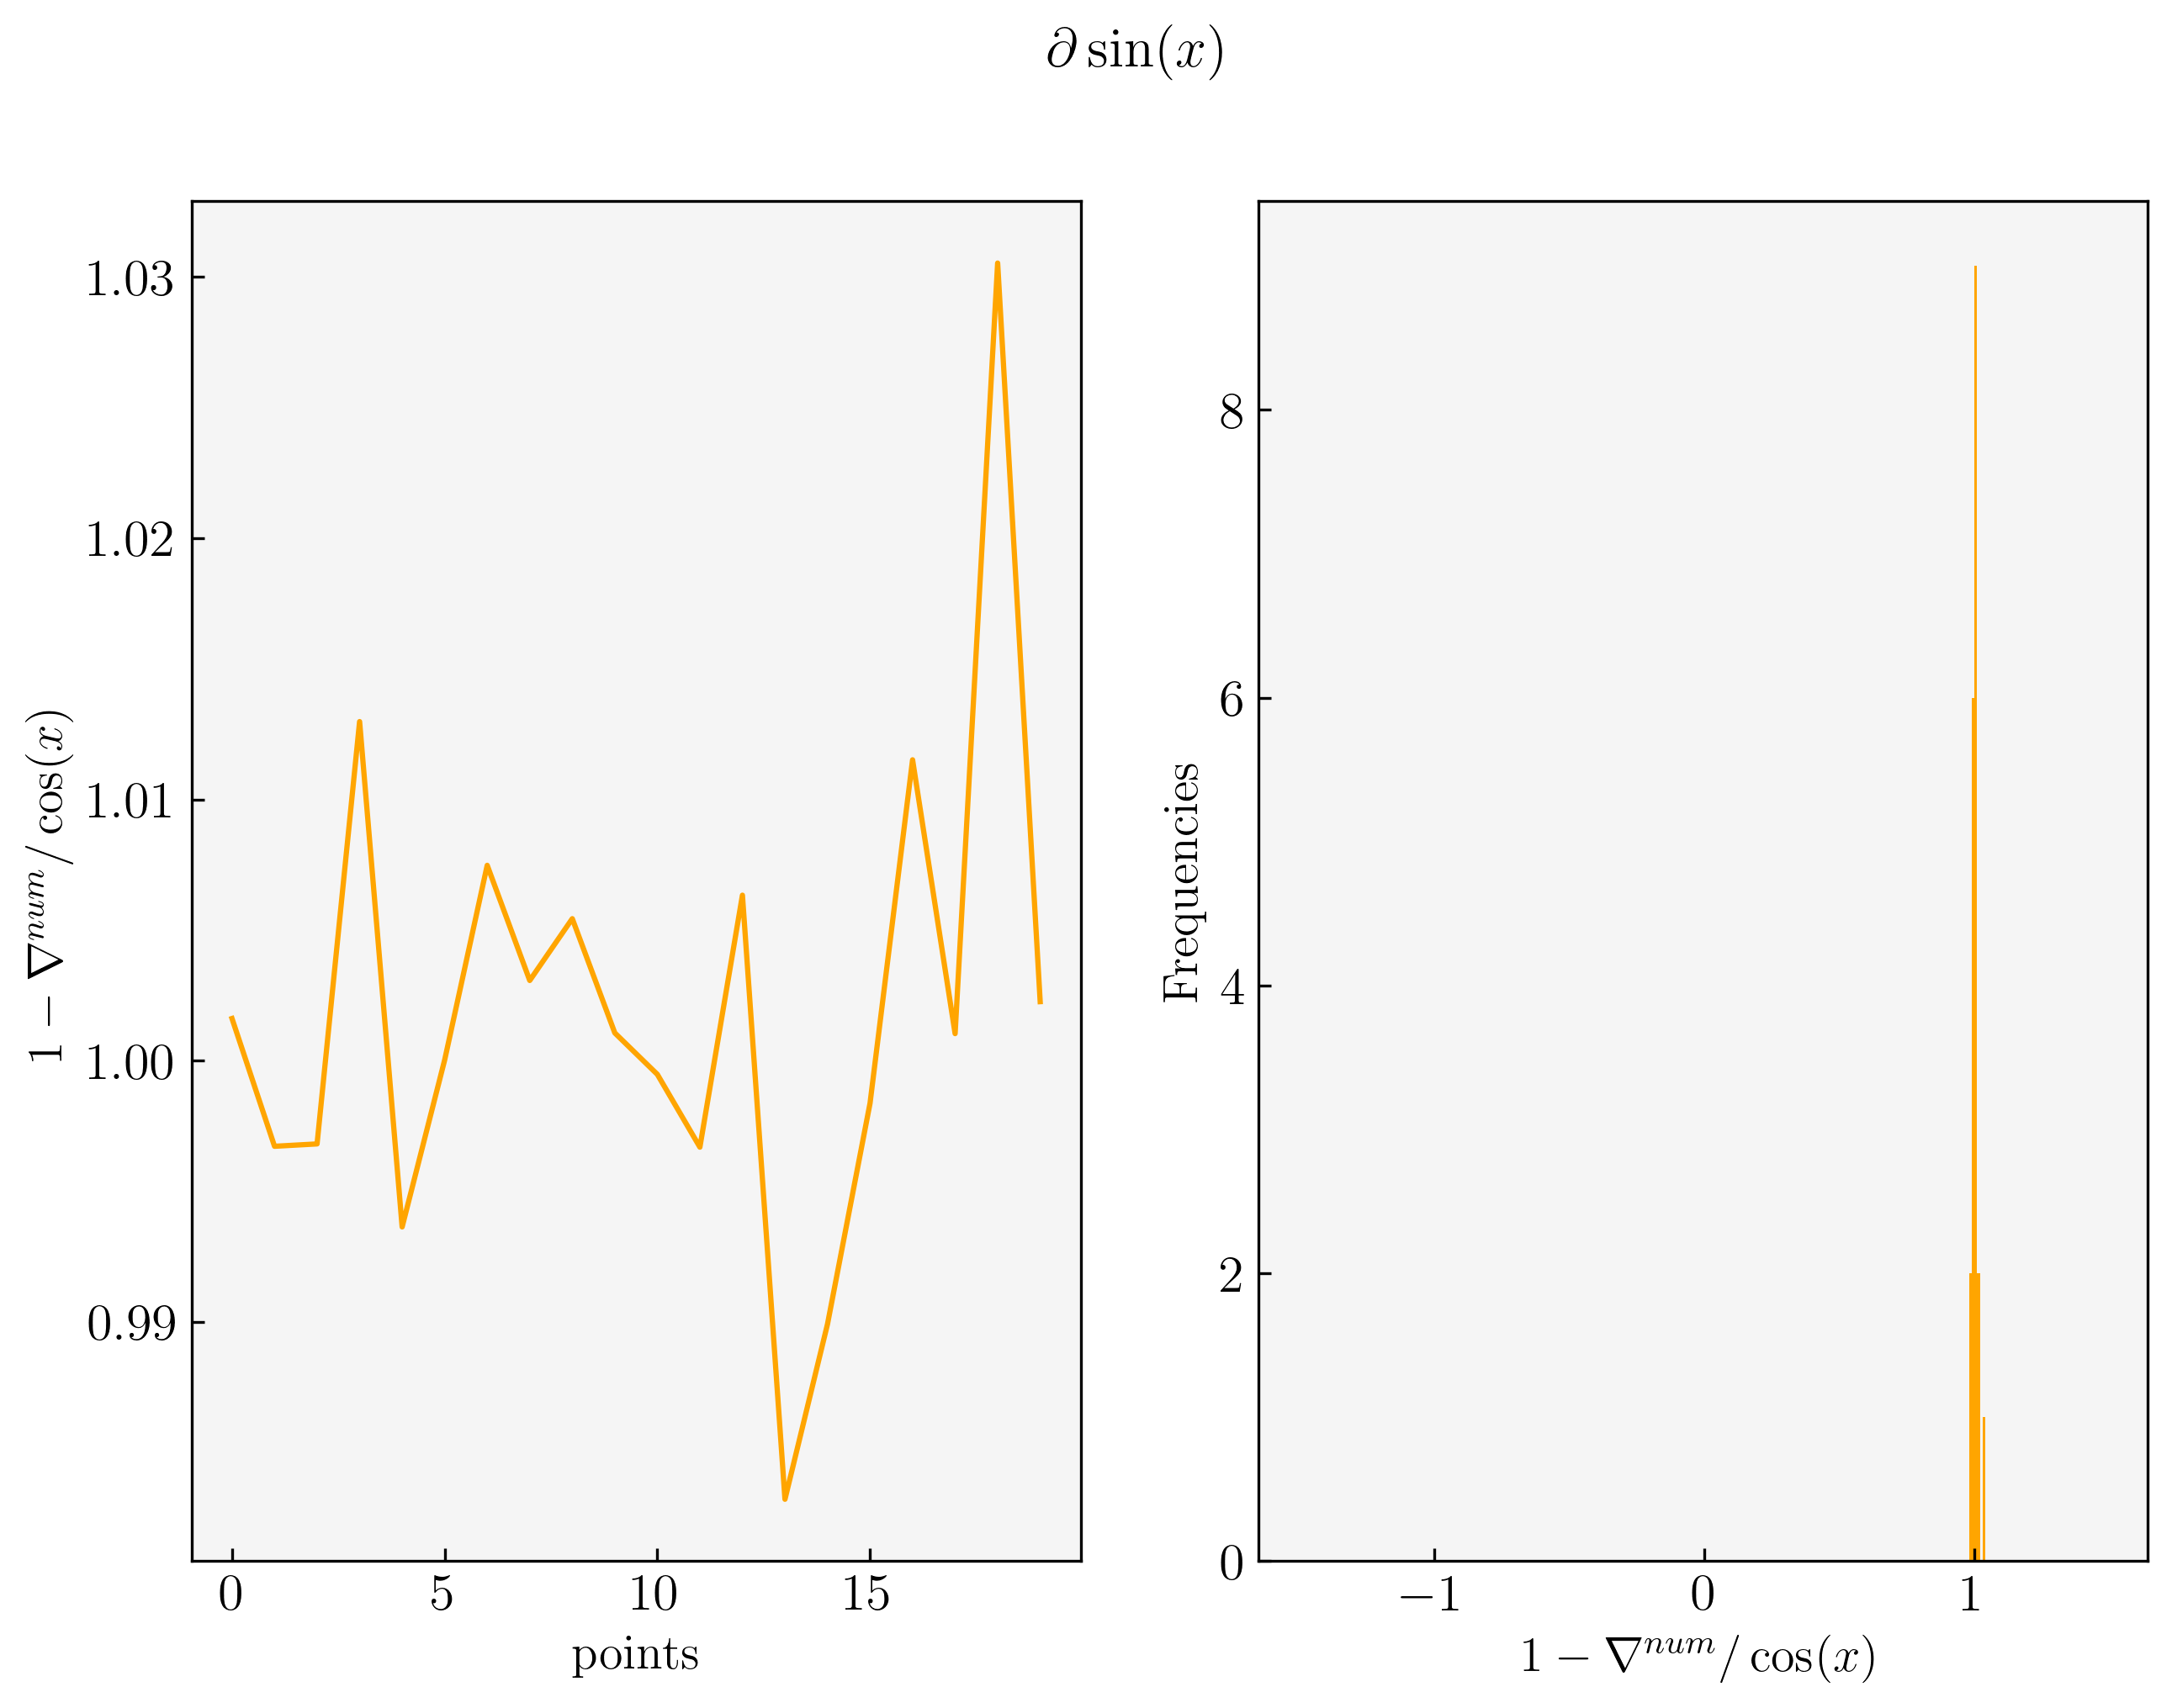

In [59]:
# Gradient T
fig, ax = plt.subplots(1,2, figsize = (10,7))
ax[0].set_xlabel('points', fontsize = 14)
ax[0].set_ylabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
ax[0].plot(ratio_test, c = 'orange',label = 'now')
bins = np.arange(-1.5, 1.5, 0.01)
ax[1].hist(ratio_test, bins=bins, color = 'orange', label = 'now')

ax[1].set_xlabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
ax[1].set_ylabel('Frequencies', fontsize = 14)

plt.suptitle(r'$\partial\sin(x)$', fontsize = 16)
#plt.savefig(f'Figs/TESTTDE_grad.png')